In [65]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
import tensorflow as tf
import matplotlib.pyplot as plt
import cv2
import os
import numpy as np

In [66]:
train = ImageDataGenerator(rescale=1/255)
validation = ImageDataGenerator(rescale=1/255)

In [67]:
train_dataset = train.flow_from_directory('C:/Users/Jimmy/Desktop/Model1/Images/train',
                                         target_size=(200,200),
                                         batch_size=3,
                                         class_mode = 'binary')
validation_dataset = train.flow_from_directory('C:/Users/Jimmy/Desktop/Model1/Images/validation',
                                         target_size=(200,200),
                                         batch_size=3,
                                         class_mode = 'binary')

Found 306 images belonging to 2 classes.
Found 34 images belonging to 2 classes.


In [68]:
train_dataset.class_indices

{'BlackHole': 0, 'Supernova': 1}

In [69]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16,(3,3),activation = 'relu', input_shape = (200,200,3)),
    tf.keras.layers.MaxPool2D(2,2),
    tf.keras.layers.Conv2D(32,(3,3),activation = 'relu'),
    tf.keras.layers.MaxPool2D(2,2),
    tf.keras.layers.Conv2D(64,(3,3),activation = 'relu'),
    tf.keras.layers.MaxPool2D(2,2),
    tf.keras.layers.Conv2D(128,(3,3),activation = 'relu'),
    tf.keras.layers.MaxPool2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512,activation='relu'),
    tf.keras.layers.Dense(1,activation='sigmoid')
    
]
)

In [70]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_24 (Conv2D)           (None, 198, 198, 16)      448       
_________________________________________________________________
max_pooling2d_24 (MaxPooling (None, 99, 99, 16)        0         
_________________________________________________________________
conv2d_25 (Conv2D)           (None, 97, 97, 32)        4640      
_________________________________________________________________
max_pooling2d_25 (MaxPooling (None, 48, 48, 32)        0         
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 46, 46, 64)        18496     
_________________________________________________________________
max_pooling2d_26 (MaxPooling (None, 23, 23, 64)        0         
_________________________________________________________________
conv2d_27 (Conv2D)           (None, 21, 21, 128)      

In [71]:
model.compile(loss='binary_crossentropy',
             optimizer = tf.keras.optimizers.Adam(),
             metrics=['accuracy'])

In [72]:
history = model.fit(train_dataset,
                     epochs=30,
                     validation_data = validation_dataset)

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 102 steps, validate for 12 steps
Epoch 1/30
102/102 [==============================] - 2s 15ms/step - loss: 0.6922 - accuracy: 0.5817 - val_loss: 0.7757 - val_accuracy: 0.5294
Epoch 2/30
102/102 [==============================] - 1s 10ms/step - loss: 0.6744 - accuracy: 0.6111 - val_loss: 0.6631 - val_accuracy: 0.5294
Epoch 3/30
102/102 [==============================] - 1s 10ms/step - loss: 0.5843 - accuracy: 0.6667 - val_loss: 0.7631 - val_accuracy: 0.5294
Epoch 4/30
102/102 [==============================] - 1s 10ms/step - loss: 0.6179 - accuracy: 0.6928 - val_loss: 0.6342 - val_accuracy: 0.7647
Epoch 5/30
102/102 [==============================] - 1s 10ms/step - loss: 0.5121 - accuracy: 0.7386 - val_loss: 0.4561 - val_accuracy: 0.7059
Epoch 6/30
102/102 [==============================] - 1s 10ms/step - loss: 0.4425 - accuracy: 0.7843 - val_loss: 0.4325 - val_accuracy: 0.7353
Epoch 7/30
102/102 [=============================

In [73]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

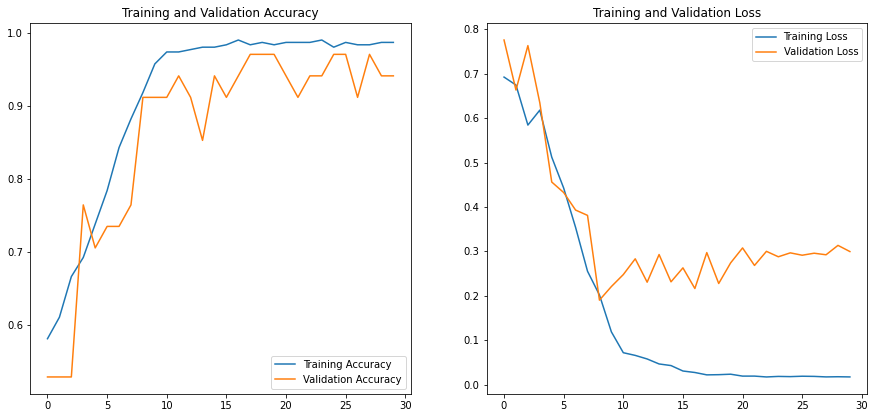

In [75]:
epochs_range = range(30)

plt.figure(figsize=(15, 15))
plt.subplot(2, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()